In [114]:
from scipy.io import loadmat
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
path = "/Users/zhengxiaopeng/Downloads/pytorch_result.mat"
dat = loadmat(path)
# print(dat)

In [115]:
name = dat['filenames']
feature = dat['feature']

In [116]:
#手肘计算最优k值
SSE = []
iteration=500
for k in range(23, 28):
    model = KMeans(n_clusters = k, n_jobs = 4, max_iter = iteration)
    model.fit(feature)
#     print('Counter',Counter(model.labels_)) # 调用Counter函数
    SSE.append(model.inertia_)


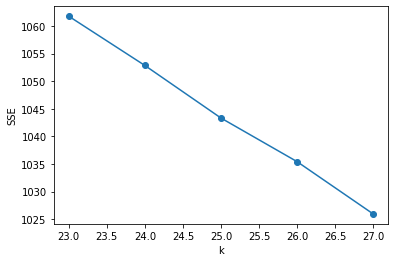

In [117]:
X = range(23, 28)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

In [113]:
##计算斜率
import math
a=[math.asin((SSE[i-1]- SSE[i])/math.sqrt((SSE[i-1]- SSE[i])*(SSE[i-1]- SSE[i])+1))*180/(math.pi) for i in range(1,39)]
print(a)
b= [a[i-1]-a[i] for i in range(1,38)]
print(b)

IndexError: list index out of range

In [118]:
######聚类
k=25
iteration=500
model = KMeans(n_clusters = k, n_jobs = 4, max_iter = iteration)
model.fit(feature)
print(model.labels_)

[22 24  0 ... 13 22 24]


In [119]:
########统计出现次数
print('Counter',Counter(model.labels_)) # 调用Counter函数


Counter Counter({4: 1118, 16: 922, 23: 825, 24: 783, 2: 756, 19: 743, 21: 738, 18: 614, 14: 542, 9: 529, 22: 502, 0: 498, 15: 491, 17: 481, 11: 469, 12: 401, 6: 396, 3: 393, 10: 393, 13: 386, 5: 359, 1: 355, 7: 283, 8: 277, 20: 206})


In [122]:
import pickle
import os.path as osp
import numpy as np
data = {
    'filenames': [],
    'features': [],
    'label': []
}
data['filenames'] = np.array(name)
data['features'] = np.array(feature)
data['label'] = np.array(model.labels_)
with open(osp.join('./data.pkl'), 'wb') as outf:
    pickle.dump(data, outf, pickle.HIGHEST_PROTOCOL)

[[-0.03175921  0.02664977 -0.02426321 ... -0.01676085  0.05276978
  -0.01592302]
 [-0.06154324  0.02545804 -0.03370134 ...  0.030567    0.02994036
   0.03533254]
 [-0.057035    0.02420273 -0.00817061 ...  0.04970338 -0.00559113
   0.02043979]
 ...
 [-0.06458613  0.05059648 -0.03539008 ... -0.00958856  0.05657209
  -0.01505227]
 [-0.02751104  0.00906508 -0.04816    ... -0.01607788  0.06406268
  -0.02445113]
 [-0.06475381  0.02808248 -0.05684653 ...  0.0064751   0.02385301
   0.04196075]]
